## First the first row of all data set describing details was deleted for acurately use as python dataset 

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math as ma

### importing all the datasets on jupyter notebook

In [145]:
df1 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions",index=0)

In [146]:
df2 =pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",index=0)

In [147]:
df3 = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress",index=0)

### checking for all the missing values in all dataset

In [148]:
emp3 = df3.isnull().sum()
emp2 = df2.isnull().sum()
emp1 = df1.isnull().sum()

#### empty cell for Transactions 

In [149]:
print(emp1)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


#### empty cell for CustomerDemographic

In [150]:
print(emp2)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64


#### empty cell for CustomerAddress

In [151]:
print(emp3)

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


#### way to remove blank items
1:- This could be done by deleting that particular row so that only complete record is analyse.<br>
2:- By filling in the mean values in the empty cells, this is only recommended when in case when
    there are enough samples in the dataset.

## Checking for duplicate records

In [152]:
# duplicate values in dataset Transactions
df1.duplicated().sum()

0

In [153]:
# duplicate values in dataset CustomerDemographic
df2.duplicated().sum()

0

In [154]:
# duplicate values in dataset CustomerAddress
df3.duplicated().sum()

0

## going through each dataset

### Transactions

In [155]:
df1.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031.0
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915.0
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,1071.23,380.74,33455.0
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0


#### identifing problems and their solutions to resolve

In [156]:
##the product first sold date have float format instead of date format so converting it into reqiured format is necceasry

### CustomerDemographic

In [157]:
df2.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


#### identifing problems and their solutions to resolve

In [158]:
df2['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [159]:
#values of gender for male and female are present in different forms ,here only basic to values either
#Male or Female should be there.
df2['gender'].replace(['F','Femal','M'],['Female','Female','Male'],inplace=True)
df2['gender'].unique()
#still an unknown value is still present 'U'
#converting it into Unknown
df2['gender'].replace(['U'],['Unknown'],inplace=True)

In [160]:
df2['gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [161]:
# removing default coulmn asd it contained unnecessary data
df2.drop("default",axis=1,inplace=True)
df2.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


### CustomerAddress

In [162]:
df3.head(10)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


#### identifing problems and their solutions to resolve

In [163]:
#in the state there are short forms present which may harm the overall analyses
df3['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [164]:
df3['state'].replace(['VIC','NSW'],['Victoria','New South Wales'],inplace = True)
df3['state'].unique()
#there is no mention what QLD signify here.

array(['New South Wales', 'QLD', 'Victoria'], dtype=object)


# Module 2

## Analysing age wise

[0, 0, 4000]


([<matplotlib.axis.XTick at 0x2dcf4a9ae08>,
 <a list of 3 Text xticklabel objects>)

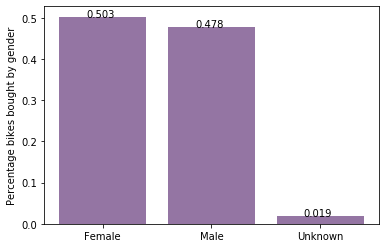

In [165]:
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df2['gender']:
    if each[0] == "Female":
        gender[0] += 1
    elif each[0] == "Male":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
bike[0] += df2['past_3_years_bike_related_purchases'][df2['gender'] == 'Female'].sum()
bike[1] += df2['past_3_years_bike_related_purchases'][df2['gender'] == 'Male'].sum()
bike[2] += df2['past_3_years_bike_related_purchases'][df2['gender'] == 'Unknown'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [166]:
#check_unique()["Category"]
df2["job_industry_category"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

([<matplotlib.axis.XTick at 0x2dcf66f53c8>,
 <a list of 9 Text xticklabel objects>)

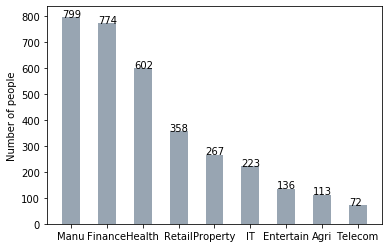

In [167]:
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.5)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

In [168]:
df2["owns_car"].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64